<a href="https://colab.research.google.com/github/ris-shar/Vehicle_Classification/blob/main/Vehicle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# % cd /content/drive/MyDrive/Colab Notebooks/datasets
# ! unzip vehicle_data -d vehicle_dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Librariespp l
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


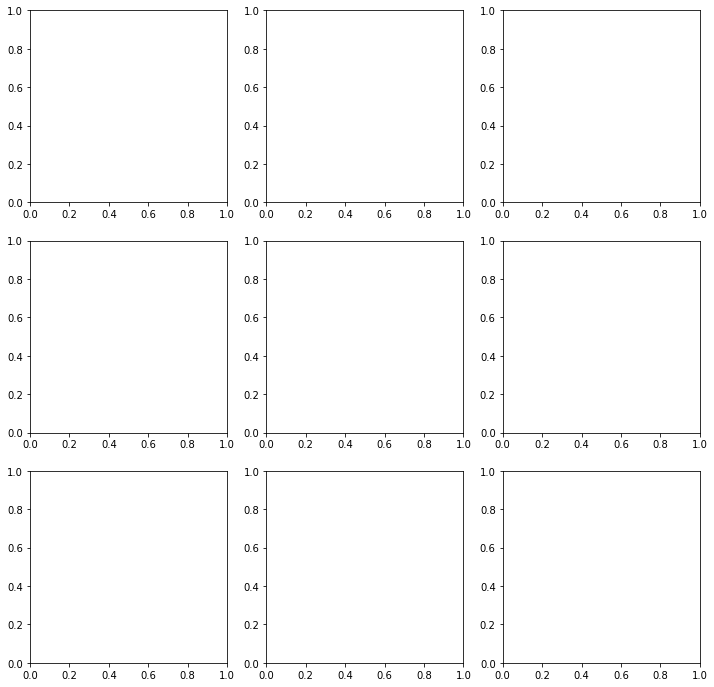

In [ ]:
picture_size = 128
folder_path = "/content/drive/MyDrive/Colab Notebooks/datasets/vehicle_dataset/"
LABEL = ['scooter', 'truck', 'bus', 'autorickshaw', 'bicycle', 'cars', 'bike', 'rickshaw']

data = 'train' + "/" # test or train
label = LABEL[3] + "/"
image_paths = os.listdir(folder_path + data + label)

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    # img = load_img(folder_path+ data + label + 
    #               image_paths[np.random.randint(0,len(image_paths))], target_size=(picture_size, picture_size))
    # plt.imshow(img)  
    # print(np.array(img).shape) 
plt.show()

In [ ]:
batch_size  = 64

datagen_train  = ImageDataGenerator(rescale = 1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2)
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              # color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              # color_mode = "grayscale",
                                              # batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 4969 images belonging to 7 classes.
Found 1237 images belonging to 7 classes.


In [ ]:
# train_set[2][0].shape#.__dict__#.keys()
# X_train, y_train = next(train_set)
# X_train.shape

## Deep Learning Model - Transfer Learning

In [ ]:
model = tf.keras.applications.VGG16(include_top=False, input_tensor=tf.keras.layers.Input(shape=(128, 128, 3)))

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-1].output

In [ ]:
# base_input.__dict__

In [ ]:
base_output = tf.keras.layers.Flatten(name="flatten")(base_output)
# custom_layer = tf.keras.layers.Dense(4096, activation="relu")(base_output)
# custom_layer = tf.keras.layers.Dense(2048, activation="relu")(custom_layer)
custom_layer = tf.keras.layers.Dense(128, activation="relu")(base_output)
custom_layer = tf.keras.layers.Dense(64, activation="relu")(custom_layer)
final_output = tf.keras.layers.Dense(7, activation="softmax", name="output")(custom_layer)

In [ ]:
custom_model = tf.keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
custom_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
custom_model.compile(optimizer=SGD(),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
custom_model.fit(train_set, epochs = 1, steps_per_epoch=(train_set.n//train_set.batch_size))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


77/77 [==============================] - 3222s 42s/step - loss: 0.8997 - accuracy: 0.6720


In [ ]:
custom_model.save("/content/drive/MyDrive/Colab Notebooks/vehicle_model.h5")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/vehicle_model.h5")

In [ ]:
model.fit(train_set, epochs = 6, steps_per_epoch=(train_set.n//train_set.batch_size))

Epoch 1/6
 5/77 [>.............................] - ETA: 38:02 - loss: 0.6109 - accuracy: 0.8156

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


77/77 [==============================] - 2563s 33s/step - loss: 0.6498 - accuracy: 0.7784
Epoch 2/6
77/77 [==============================] - 2188s 28s/step - loss: 0.5197 - accuracy: 0.8218
Epoch 3/6
77/77 [==============================] - 2212s 29s/step - loss: 0.3771 - accuracy: 0.8663
Epoch 4/6
77/77 [==============================] - 2217s 29s/step - loss: 0.3905 - accuracy: 0.8728
Epoch 5/6
77/77 [==============================] - 2215s 29s/step - loss: 0.2827 - accuracy: 0.9019
Epoch 6/6
77/77 [==============================] - 2214s 29s/step - loss: 0.2282 - accuracy: 0.9240


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/vehicle_model.h5")

In [ ]:
model.fit(train_set, epochs = 3, steps_per_epoch=(train_set.n//train_set.batch_size))
model.save("/content/drive/MyDrive/Colab Notebooks/vehicle_model.h5")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/3
77/77 [==============================] - 2210s 29s/step - loss: 0.1986 - accuracy: 0.9305
Epoch 2/3
77/77 [==============================] - 2217s 29s/step - loss: 0.2310 - accuracy: 0.9246
Epoch 3/3
77/77 [==============================] - 2211s 29s/step - loss: 0.2069 - accuracy: 0.9335
